In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob


In [2]:
folders = glob('input/A_DeviceMotion_data/*_*')
folders = [s for s in folders if "csv" not in s]

In [3]:
# Activety types dict:
Activety_Types = {'dws':1,'jog':2,'sit':3,'std':4,'ups':5,'wlk':6}        
listDict = list(Activety_Types.keys())

In [8]:
df_all_list = []
exp = 0
# Segment the data to 400 sampels frames , each one will be a different Expirament
segment_size = 400

# Load All data:
for j  in folders:
    csv = glob(j + '/*' )

    for i in csv:
        df = pd.read_csv(i)
        # Add Activety label, Subject name and Experiment number
        df['Activity'] = Activety_Types[j[26:29]]
        df['Sub_Num'] = i[len(j)+5:-4]
        df['Exp_num'] = 1
        ExpNum = np.zeros((df.shape[0])) 
        for i in range(0,df.shape[0]-segment_size,segment_size):
            ExpNum[range(i,i+segment_size)] = i/segment_size +exp*100 
        df['Exp_num'] = ExpNum
        #Df_all = pd.concat([Df_all,df])
        df_all_list.append(df)
        exp += 1        

Df_all = pd.concat(df_all_list,axis=0)  

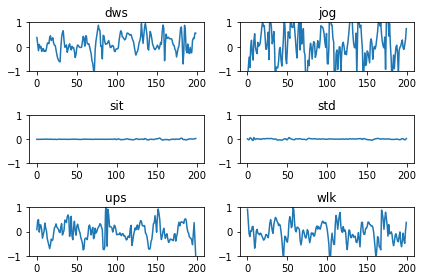

In [9]:
# let's see the data
Df_all.head()
plt.plot([1,2,3])
# now create a subplot which represents the top plot of a grid
# with 2 rows and 1 column. Since this subplot will overlap the
# first, the plot (and its axes) previously created, will be removed
#plt.subplot(2,1,1)
#plt.plot(range(12))
for i in range(6):
    D = Df_all[Df_all['Activity']==i+1]
    plt.subplot(3,2,i+1)
    plt.plot(D['userAcceleration.z'][:200])
    plt.title(listDict[i])
    plt.ylim([-1, 1])
plt.tight_layout()